In [98]:
import pandas as pd
import numpy as np
import seaborn as sns

In [99]:
df = pd.read_csv("/content/product_return_prediction.csv")

In [100]:
df.head()

,order_id,product_id,price,rating,return_status
0,O0001,P909,141.90,3,0
1,O0002,P778,232.72,3,0
2,O0003,P508,496.90,3,0
3,O0004,P763,138.81,3,0
4,O0005,P255,453.40,1,1


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       1500 non-null   object 
 1   product_id     1500 non-null   object 
 2   price          1500 non-null   float64
 3   rating         1500 non-null   int64  
 4   return_status  1500 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 58.7+ KB


In [102]:
df.describe()

,price,rating,return_status
count,1500.000000,1500.000000,1500.000000
mean,251.344100,2.985333,0.270667
std,139.258771,1.404196,0.444452
min,10.430000,1.000000,0.000000
25%,131.625000,2.000000,0.000000
50%,250.135000,3.000000,0.000000
75%,367.025000,4.000000,1.000000
max,499.690000,5.000000,1.000000


In [103]:
df.columns

Index(['order_id', 'product_id', 'price', 'rating', 'return_status'], dtype='object')

In [104]:
df['return_status'].value_counts()

,count
return_status,
0,1094
1,406


In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

In [106]:
sns.set(style='whitegrid')

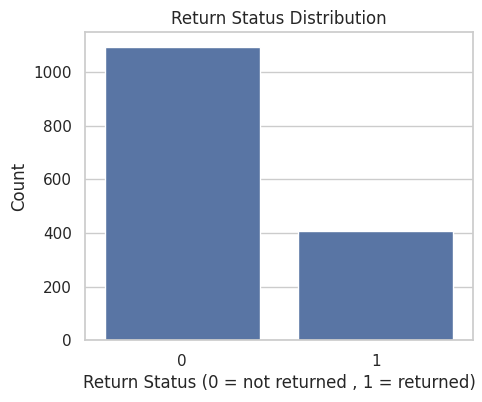

In [107]:
#plot distribution of target class
plt.figure(figsize=(5,4))
sns.countplot(x='return_status', data=df)
plt.title('Return Status Distribution')
plt.xlabel('Return Status (0 = not returned , 1 = returned)')
plt.ylabel('Count')
plt.show()

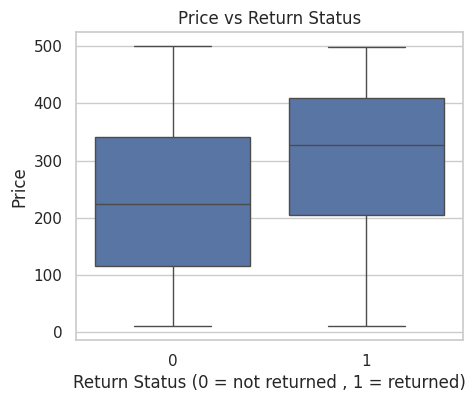

In [108]:
#price vs return status (boxplot)
plt.figure(figsize=(5,4))
sns.boxplot(x='return_status' , y='price' , data=df)
plt.title('Price vs Return Status')
plt.xlabel('Return Status (0 = not returned , 1 = returned)')
plt.ylabel('Price')
plt.show()

products with higher prices get returned more

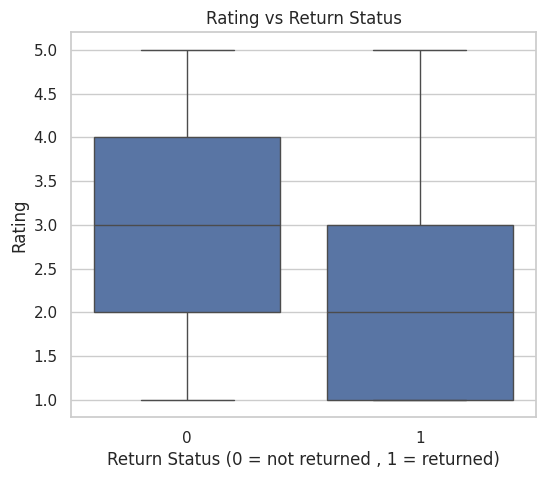

In [109]:
#rating vs return status
plt.figure(figsize=(6,5))
sns.boxplot(x='return_status' , y='rating' , data=df)
plt.title('Rating vs Return Status')
plt.xlabel('Return Status (0 = not returned , 1 = returned)')
plt.ylabel('Rating')
plt.show()

product with less rating get returned more

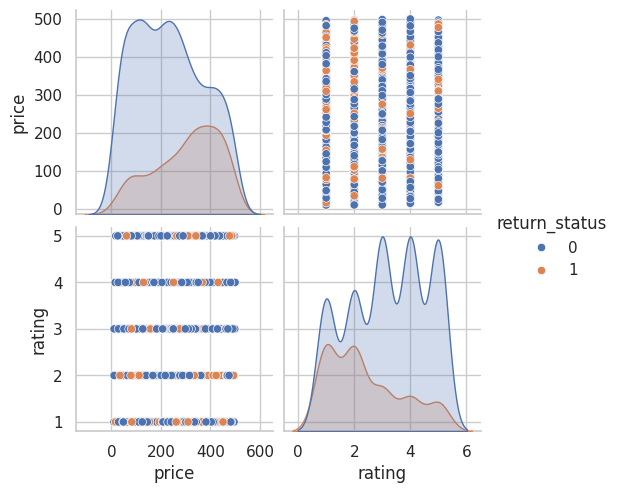

In [110]:
sns.pairplot(df, hue='return_status', vars=['price', 'rating'])


In [111]:
#drop id columns - they are no useful for predictio
df = df.drop(columns=['order_id' , 'product_id'])

order_id and product_id are uniuq identifiers , they are not useful in prdiction

In [112]:
#check missing values
print(df.isnull().sum())

price            0
rating           0
return_status    0
dtype: int64


no null values

In [113]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['price' , 'rating']] = scaler.fit_transform(df[['price' , 'rating']]) # Call fit_transform with the data

why use this :
1.to normalize data on similar scale

2.avoid bias towards larger-scale features

In [114]:
X= df .drop(columns=['return_status'])
y= df['return_status']


x= all the input features (model learns from)

y= target label (what modle is trying to predict)

#Model training

In [115]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(
    X , y ,test_size=0.2, stratify=y , random_state=42
)

X and y are which is defined above not anything diffrent

If y is a classification target (like 0 or 1),

this keeps the same proportion of 0s and 1s in both y_train and y_test.

To avoid class imbalance after splitting

In [116]:
from sklearn.metrics import accuracy_score , f1_score , roc_auc_score , confusion_matrix

def evaluate_model(model , X_train , X_test , y_train , y_test):
  model.fit(X_train , y_train)
  y_pred = model.predict(X_test)
  y_proba = model.predict_proba(X_test)[:,1] #fpr auc

  print("Accuracy:" , accuracy_score(y_test , y_pred))
  print("f1 score:" , f1_score(y_test , y_pred))
  print("roc-auc:" , roc_auc_score(y_test , y_proba))
  print("confusion matrix:\n", confusion_matrix(y_test , y_pred))

##Logistic Regression

In [117]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
evaluate_model(logreg , X_train , X_test , y_train , y_test)

Accuracy: 0.7266666666666667
f1 score: 0.3050847457627119
roc-auc: 0.6991938666215682
confusion matrix:
 [[200  19]
 [ 63  18]]


Based on the Receiver Operating Characteristic (ROC) curve.

AUC = Area Under the Curve:

1.0 = perfect classifier

0.5 = random guessing

🔍 Confusion Matrix Breakdown

Predicted 0	Predicted 1
Actual 0 (TN)	200	19 (FP)
Actual 1 (FN)	63	18 (TP)

True Negatives (TN) = 200 → Correctly predicted class 0

False Positives (FP) = 19 → Predicted 1 but it was 0

False Negatives (FN) = 63 → Predicted 0 but it was 1

True Positives (TP) = 18 → Correctly predicted class 1

⚖️ F1 Score = 0.305

Low F1 indicates poor performance on the positive class (class 1).

The model is not good at both precision and recall for class 1.

📈 ROC-AUC = 0.699

AUC-ROC is 0.699, which is decent but not great.

Means the model can distinguish between classes 69.9% of the time.

##Random Forest

In [121]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100 , random_state=42)
evaluate_model(rf , X_train , X_test , y_train , y_test)

Accuracy: 0.61
f1 score: 0.2994011976047904
roc-auc: 0.5388973448334179
confusion matrix:
 [[158  61]
 [ 56  25]]


n_estimators :

The number of decision trees in the forest.

random_state=42

sets the seed for Python’s random number generator, which ensures that your model behaves the same way every time you run it.

In [122]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder = False ,eval_metrics = 'logloss', random_state=42)
evaluate_model(xgb , X_train , X_test , y_train , y_test)


Accuracy: 0.6566666666666666
f1 score: 0.32679738562091504
roc-auc: 0.5730875472123569
confusion matrix:
 [[172  47]
 [ 56  25]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:52:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "eval_metrics", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


use_label_encoder=False

Setting this to False disables that behavior and removes a deprecation warning.

eval_metric='logloss'

Sets the evaluation metric for model training.

logloss = logarithmic loss (used for binary classification).

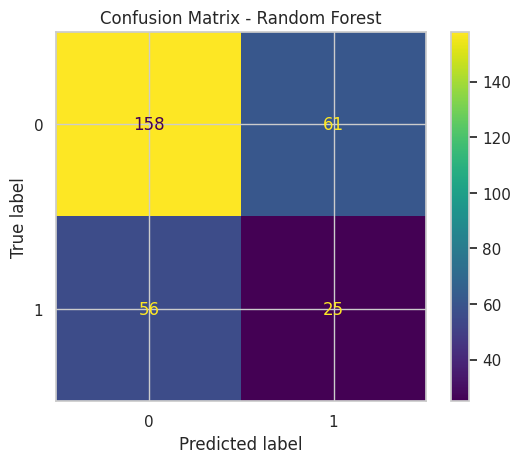

In [123]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix for best model (replace rf with your chosen model)
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [125]:
# SHAP for Explainability (on XGBoost)

!pip install shap

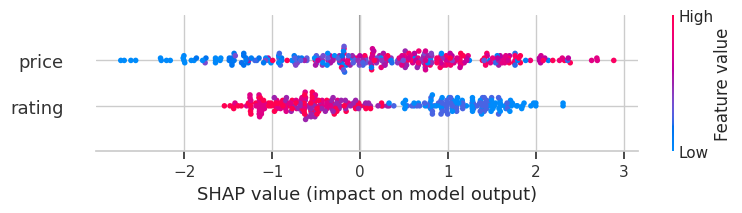

In [126]:
import shap

#iniialize shap explainer
explainer =shap .Explainer(xgb , X_train)

#compute shap values
shap_values = explainer(X_test)

#summary plot(shows most importnat feature)
shap.summary_plot(shap_values , X_test)

In [127]:
#cross-Validation (Stratified K-Fold)
from sklearn.model_selection import cross_val_score
import numpy as np

# Evaluate with 5-fold cross-validation
scores = cross_val_score(rf, X, y, cv=5, scoring='f1')
print("F1 Score (5-fold):", np.round(scores, 3))
print("Mean F1 Score:", np.round(scores.mean(), 3))

F1 Score (5-fold): [0.439 0.342 0.36  0.296 0.297]
Mean F1 Score: 0.347
